In [1]:
import util
from tqdm import tqdm
import preprocess
import prompt
import postprocess
import evaluation
import visualization
import json
import os
from collections import Counter
import random
import numpy as np

/Users/lucachangretta/opt/anaconda3/envs/Thesis/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image_filenames = preprocess.get_all_image_paths('evaluation_dataset/images/case*.png')
questions = util.load_json('evaluation_dataset/questions.json')
questions_with_choices = util.load_json('evaluation_dataset/questions_with_choices.json')
questions_with_choices_explained = util.load_json('evaluation_dataset/questions_with_choices_explained.json')
examples = util.load_json('evaluation_dataset/examples.json')[0]
with open("evaluation_dataset/choices_per_feature.json", "r") as f:
    choices_per_feature_freq = json.load(f)
with open("evaluation_dataset/class_support.json", "r") as f:
    class_support = json.load(f)

Loaded content from evaluation_dataset/questions.json
Loaded content from evaluation_dataset/questions_with_choices.json
Loaded content from evaluation_dataset/questions_with_choices_explained.json
Loaded content from evaluation_dataset/examples.json


In [3]:
def analysis_pipeline(experiment_name: str):
    """
    The function analyzes the annotations by calculating feature weighted recall,
    storing the result and plotting it.
    This function can only be used when all annotations are generated as it 
    automatically reads the annotation files stored in the experiment_name folder.

    Parameters
    ----------
    experiment_name:
        The experiment name (which is also the folder name) which contains the annotations.
    """
    doc_anns, gpt_anns, features = postprocess.extract_annotations(
        'evaluation_dataset/doc_anns.json',
        f'evaluation_results/{experiment_name}/gpt_anns.json',
        f'evaluation_results/{experiment_name}/anns_comparison.xlsx'
    )
    features_acc = evaluation.compute_feature_accuracies(doc_anns, gpt_anns, features, choices_per_feature_freq, average='weighted')
    util.save_as_json(features_acc, f'evaluation_results/{experiment_name}/features_acc.json')

# Zeroshot

In [ ]:
exp_name_bs = 'Zeroshot'

In [ ]:
query = ' '.join(str(item) for item in questions_with_choices)
ann_bs = []
for image_path in tqdm(image_filenames):
    ann_bs.append(prompt.zeroshot(image_path, query))
util.save_as_json(ann_bs, f'evaluation_results/{exp_name_bs}/annotations.json')

In [ ]:
anns_bs = util.load_json(f'evaluation_results/{exp_name_bs}/annotations.json')
answers_bs = []
for ann in anns_bs:
    answer_bs = postprocess.extract_answers(questions_with_choices, ann)
    answers_bs.append(answer_bs)
util.save_as_json(answers_bs, f'evaluation_results/{exp_name_bs}/gpt_anns.json')

In [ ]:
analysis_pipeline(exp_name_bs)

# Zeroshot Var

In [ ]:
exp_name_var = 'Zeroshot_Var'
exp_num = 5

In [ ]:
query = ' '.join(str(item) for item in questions_with_choices)
for i in range(exp_num):
    ann_var = []
    for image_path in tqdm(image_filenames):
        ann_var.append(prompt.zeroshot(image_path, query))
    util.save_as_json(ann_var, f'evaluation_results/{exp_name_var}/annotations{i}.json')

In [ ]:
for i in range(exp_num):
    anns_var = util.load_json(f'evaluation_results/{exp_name_var}/annotations{i}.json')
    answers_var = []
    for ann in anns_var:
        answer_var = postprocess.extract_answers(questions_with_choices, ann)
        answers_var.append(answer_var)
    util.save_as_json(answers_var, f'evaluation_results/{exp_name_var}/gpt_anns{i}.json')

In [ ]:
for i in range(exp_num):
    doc_anns, gpt_anns, features = postprocess.extract_annotations(
        'evaluation_dataset/doc_anns.json',
        f'evaluation_results/{exp_name_var}/gpt_anns{i}.json',
        f'evaluation_results/{exp_name_var}/annotations_comparison{i}.xlsx'
    )

    features_acc = evaluation.compute_feature_accuracies(doc_anns, gpt_anns, features, choices_per_feature_freq)
    util.save_as_json(features_acc, f'evaluation_results/{exp_name_var}/features_acc{i}.json')

# Zeroshot Var Explained

In [ ]:
exp_name_var = 'Zeroshot_Var_Explained'
exp_num = 5

In [ ]:
query = ' '.join(str(item) for item in questions_with_choices_explained)
for i in range(exp_num):
    ann_var = []
    for image_path in tqdm(image_filenames):
        ann_var.append(prompt.zeroshot(image_path, query))
    util.save_as_json(ann_var, f'evaluation_results/{exp_name_var}/annotations{i}.json')

In [ ]:
for i in range(exp_num):
    anns_var = util.load_json(f'evaluation_results/{exp_name_var}/annotations{i}.json')
    answers_var = []
    for ann in anns_var:
        answer_var = postprocess.extract_answers(questions_with_choices, ann)
        answers_var.append(answer_var)
    util.save_as_json(answers_var, f'evaluation_results/{exp_name_var}/gpt_anns{i}.json')

In [ ]:
for i in range(exp_num):
    doc_anns, gpt_anns, features = postprocess.extract_annotations(
        'evaluation_dataset/doc_anns.json',
        f'evaluation_results/{exp_name_var}/gpt_anns{i}.json',
        f'evaluation_results/{exp_name_var}/annotations_comparison{i}.xlsx'
    )

    features_acc = evaluation.compute_feature_accuracies(doc_anns, gpt_anns, features, choices_per_feature_freq)
    util.save_as_json(features_acc, f'evaluation_results/{exp_name_var}/features_acc{i}.json')

# Zeroshot Free

In [ ]:
exp_name_bsf = 'Zeroshot_free'

In [ ]:
query = ' '.join(str(item) for item in questions_with_choices)
ann_bsf = []
for image_path in tqdm(image_filenames):
    ann_bsf.append(prompt.zeroshot_free(image_path, query))
util.save_as_json(ann_bsf, f'evaluation_results/{exp_name_bsf}/annotations.json')

In [ ]:
anns_bsf = util.load_json(f'evaluation_results/{exp_name_bsf}/annotations.json')
answers_bsf = []
for ann in anns_bsf:
    answer_bsf = postprocess.extract_answers(questions_with_choices, ann)
    answers_bsf.append(answer_bsf)
util.save_as_json(answers_bsf, f'evaluation_results/{exp_name_bsf}/gpt_anns.json')

In [ ]:
analysis_pipeline(exp_name_bsf)

# Fewshots

In [ ]:
exp_name_fs = 'Fewshots'

In [ ]:
query = ' '.join(str(item) for item in questions_with_choices)
fewshot_ex = ' '.join(item for item in examples['fewshots'])
ann_fs = []
for image_path in tqdm(image_filenames):
    ann_fs.append(prompt.fewshots(image_path, query, fewshot_ex))
util.save_as_json(ann_fs, f'evaluation_results/{exp_name_fs}/annotations.json')

In [ ]:
anns_fs = util.load_json(f'evaluation_results/{exp_name_fs}/annotations.json')
answers_fs = []
for ann in anns_fs:
    answer_fs = postprocess.extract_answers(questions_with_choices, ann)
    answers_fs.append(answer_fs)
util.save_as_json(answers_fs, f'evaluation_results/{exp_name_fs}/gpt_anns.json')

In [ ]:
analysis_pipeline(exp_name_fs)

# Fewshots with Images

In [ ]:
exp_name_fsimg = 'FewshotsImg'

In [ ]:
query = ' '.join(str(item) for item in questions_with_choices)
ann_fsimg = []
for image_path in tqdm(image_filenames):
    ann_fsimg.append(prompt.fewshotsImg(image_path, query, 'evaluation_dataset/images/case1.png', examples['fewshots'][0], 'evaluation_dataset/images/case5.png', examples['fewshots'][1]))
util.save_as_json(ann_fsimg, f'evaluation_results/{exp_name_fsimg}/annotations.json')

In [ ]:
anns_fsimg = util.load_json(f'evaluation_results/{exp_name_fsimg}/annotations.json')
answers_fsimg = []
for ann in anns_fsimg:
    answer_fsimg = postprocess.extract_answers(questions_with_choices, ann)
    answers_fsimg.append(answer_fsimg)
util.save_as_json(answers_fsimg, f'evaluation_results/{exp_name_fsimg}/gpt_anns.json')

# CoT + Fewshots

In [ ]:
exp_name_cot = 'CoTFewshots'

In [ ]:
query = ' '.join(str(item) for item in questions_with_choices)
cot_ex = ' '.join(item for item in examples['cot'])
ann_cot = []
for image_path in tqdm(image_filenames):
    ann_cot.append(prompt.CoTFewshots(image_path, query, cot_ex))
util.save_as_json(ann_cot, f'evaluation_results/{exp_name_cot}/annotations.json')

In [ ]:
anns_cot = util.load_json(f'evaluation_results/{exp_name_cot}/annotations.json')
answers_cot = []
for ann in anns_cot:
    answer_cot = postprocess.extract_answers(questions_with_choices, ann)
    answers_cot.append(answer_cot)
util.save_as_json(answers_cot, f'evaluation_results/{exp_name_cot}/gpt_anns.json')

In [ ]:
analysis_pipeline(exp_name_cot)

# ToT + Fewshots

In [ ]:
exp_name_tot = 'ToTFewshots'

In [ ]:
tot_ex = ' '.join(item for item in examples['cot'])
query = ' '.join(str(item) for item in questions_with_choices)
ann_tot = []
for image_path in tqdm(image_filenames):
    ann_tot.append(prompt.ToTFewshots(image_path, query, tot_ex, 2, 3))
util.save_as_json(ann_tot, f'evaluation_results/{exp_name_tot}/annotations.json')

In [ ]:
anns_tot = util.load_json(f'evaluation_results/{exp_name_tot}/annotations.json')
answers_tot = []
for ann in anns_tot:
    answer_tot = postprocess.extract_answers(questions_with_choices, ann)
    answers_tot.append(answer_tot)
util.save_as_json(answers_tot, f'evaluation_results/{exp_name_tot}/gpt_anns.json')

In [ ]:
analysis_pipeline(exp_name_tot)

# Self Consistency

In [ ]:
exp_name_var = 'Consistency'
exp_num = 5
cot_ex = ' '.join(item for item in examples['cot'])
query = ' '.join(str(item) for item in questions_with_choices)
for i in range(exp_num):
    ann_var = []
    for image_path in tqdm(image_filenames):
        ann_var.append(prompt.CoTFewshots(image_path, query, cot_ex))
    util.save_as_json(ann_var, f'evaluation_results/{exp_name_var}/annotations{i}.json')
for i in range(exp_num):
    anns_var = util.load_json(f'evaluation_results/{exp_name_var}/annotations{i}.json')
    answers_var = []
    for ann in anns_var:
        answer_var = postprocess.extract_answers(questions_with_choices, ann)
        answers_var.append(answer_var)
    util.save_as_json(answers_var, f'evaluation_results/{exp_name_var}/gpt_anns{i}.json')
for i in range(exp_num):
    doc_anns, gpt_anns, features = postprocess.extract_annotations(
        'evaluation_dataset/doc_anns.json',
        f'evaluation_results/{exp_name_var}/gpt_anns{i}.json',
        f'evaluation_results/{exp_name_var}/annotations_comparison{i}.xlsx'
    )

    features_acc = evaluation.compute_feature_accuracies(doc_anns, gpt_anns, features, choices_per_feature_freq)
    util.save_as_json(features_acc, f'evaluation_results/{exp_name_var}/features_acc{i}.json')

In [ ]:
final_answer = []
for i in range(25):
    consistent_ans = {}
    case_answers = []
    for j in range(5):
        file_path = f"evaluation_results/Consistency/gpt_anns{j}.json"
        answers = util.load_json(file_path)
        case_answer = json.loads(answers[i])
        case_answers.append(case_answer)
    for item in range(len(case_answers[0])):
        values = []
        for index in range(5):
            values.append(list(case_answers[index].values())[item])
            value_counts = Counter(values)
            value, _ = value_counts.most_common(1)[0]
            consistent_ans[list(case_answers[0].keys())[item]] = value
    final_answer.append(json.dumps(consistent_ans))
util.save_as_json(final_answer, 'evaluation_results/Consistency/gpt_anns.json')

In [ ]:
analysis_pipeline('Consistency')

# Self-debate

In [ ]:
exp_name_tot = 'Debate'

In [ ]:
tot_ex = ' '.join(item for item in examples['debate'])
query = ' '.join(str(item) for item in questions_with_choices)
ann_tot = []
for image_path in tqdm(image_filenames):
    ann_tot.append(prompt.self_debate(image_path, query, tot_ex))
util.save_as_json(ann_tot, f'evaluation_results/{exp_name_tot}/annotations.json')

In [ ]:
anns_tot = util.load_json(f'evaluation_results/{exp_name_tot}/annotations.json')
answers_tot = []
for ann in anns_tot:
    answer_tot = postprocess.extract_answers(questions_with_choices, ann)
    answers_tot.append(answer_tot)
util.save_as_json(answers_tot, f'evaluation_results/{exp_name_tot}/gpt_anns.json')

In [ ]:
analysis_pipeline(exp_name_tot)

# Self-Critique

In [ ]:
exp_name_tot = 'Critique'

In [ ]:
cri_ex = ' '.join(item for item in examples['critique'])
query = ' '.join(str(item) for item in questions_with_choices)
ann_tot = []
for image_path in tqdm(image_filenames):
    ann_tot.append(prompt.self_critique(image_path, query, cri_ex))
util.save_as_json(ann_tot, f'evaluation_results/{exp_name_tot}/annotations.json')

In [ ]:
anns_tot = util.load_json(f'evaluation_results/{exp_name_tot}/annotations.json')
answers_tot = []
for ann in anns_tot:
    answer_tot = postprocess.extract_answers(questions_with_choices, ann)
    answers_tot.append(answer_tot)
util.save_as_json(answers_tot, f'evaluation_results/{exp_name_tot}/gpt_anns.json')

In [ ]:
analysis_pipeline(exp_name_tot)

# Temperature Test

In [7]:
cri_ex = ' '.join(item for item in examples['critique'])
query = ' '.join(str(item) for item in questions_with_choices)

for temp in np.linspace(0, 0.6, 5):
    exp_name_temp = f'Temperature_{temp}'
    ann_temp = []
    for image_path in tqdm(image_filenames):
        ann_temp.append(prompt.self_critique(image_path, query, cri_ex, temperature=temp))
    util.save_as_json(ann_temp, f'evaluation_results/{exp_name_temp}/annotations.json')
    anns_temp = util.load_json(f'evaluation_results/{exp_name_temp}/annotations.json')
    answers_temp = []
    for ann in anns_temp:
        answer_temp = postprocess.extract_answers(questions_with_choices, ann)
        answers_temp.append(answer_temp)
    util.save_as_json(answers_temp, f'evaluation_results/{exp_name_temp}/gpt_anns.json')
    analysis_pipeline(exp_name_temp)

100%|██████████| 25/25 [13:12<00:00, 31.71s/it]


Saved content to evaluation_results/Temperature_0.0/annotations.json
Loaded content from evaluation_results/Temperature_0.0/annotations.json
Saved content to evaluation_results/Temperature_0.0/gpt_anns.json
Loaded content from evaluation_dataset/doc_anns.json
Loaded content from evaluation_results/Temperature_0.0/gpt_anns.json
Saved content to evaluation_results/Temperature_0.0/features_acc.json


100%|██████████| 25/25 [10:59<00:00, 26.39s/it]


Saved content to evaluation_results/Temperature_0.15/annotations.json
Loaded content from evaluation_results/Temperature_0.15/annotations.json
Saved content to evaluation_results/Temperature_0.15/gpt_anns.json
Loaded content from evaluation_dataset/doc_anns.json
Loaded content from evaluation_results/Temperature_0.15/gpt_anns.json
Saved content to evaluation_results/Temperature_0.15/features_acc.json


100%|██████████| 25/25 [09:59<00:00, 23.99s/it]


Saved content to evaluation_results/Temperature_0.3/annotations.json
Loaded content from evaluation_results/Temperature_0.3/annotations.json
Saved content to evaluation_results/Temperature_0.3/gpt_anns.json
Loaded content from evaluation_dataset/doc_anns.json
Loaded content from evaluation_results/Temperature_0.3/gpt_anns.json
Saved content to evaluation_results/Temperature_0.3/features_acc.json


100%|██████████| 25/25 [09:54<00:00, 23.79s/it]


Saved content to evaluation_results/Temperature_0.44999999999999996/annotations.json
Loaded content from evaluation_results/Temperature_0.44999999999999996/annotations.json
Saved content to evaluation_results/Temperature_0.44999999999999996/gpt_anns.json
Loaded content from evaluation_dataset/doc_anns.json
Loaded content from evaluation_results/Temperature_0.44999999999999996/gpt_anns.json
Saved content to evaluation_results/Temperature_0.44999999999999996/features_acc.json


100%|██████████| 25/25 [10:26<00:00, 25.06s/it]


Saved content to evaluation_results/Temperature_0.6/annotations.json
Loaded content from evaluation_results/Temperature_0.6/annotations.json
Saved content to evaluation_results/Temperature_0.6/gpt_anns.json
Loaded content from evaluation_dataset/doc_anns.json
Loaded content from evaluation_results/Temperature_0.6/gpt_anns.json
Saved content to evaluation_results/Temperature_0.6/features_acc.json


# Single

In [ ]:
exp_name_sg = f'Single'

In [ ]:
anns_sg = []
cot_ex = ' '.join(item for item in examples['cot'])
for image_path in tqdm(image_filenames):
    single_ans = ''
    for question in questions_with_choices:
        single_ans += prompt.CoTFewshots(image_path, question, cot_ex)
    anns_sg.append(single_ans)
util.save_as_json(anns_sg, f'evaluation_results/{exp_name_sg}/annotations.json')

In [ ]:
anns_sg = util.load_json(f'evaluation_results/{exp_name_sg}/annotations.json')
answers_sg = []
for ann in anns_sg:
    answer_sg = postprocess.extract_answers(questions_with_choices, ann)
    answers_sg.append(answer_sg)
util.save_as_json(answers_sg, f'evaluation_results/{exp_name_sg}/gpt_anns.json')

In [ ]:
analysis_pipeline(exp_name_sg)

# Leave one out

In [ ]:
exp_name_loo = f'Leave_one_out_txt'
doc_anns = util.load_json('evaluation_dataset/doc_anns.json')
questions = preprocess.extract_questions('evaluation_dataset/questions.json')

In [ ]:
anns_loo = []
cri_ex = ' '.join(item for item in examples['cri'])
for i, image_path in enumerate(image_filenames):
    print(i)
    image_path = image_filenames[i]
    doc_ann = doc_anns[i]
    single_ans = ''
    for (question, qa) in tqdm(zip(questions, questions_with_choices)):
        doc_ann_copy = doc_ann.copy()
        doc_ann_copy.pop(question)
        information = "\n".join(f"{key}{value}" for key, value in list(doc_ann_copy.items())[:-1])
        single_ans += prompt.leave_one_out_txt(information, qa, cri_ex)
    anns_loo.append(single_ans)
util.save_as_json(anns_loo, f'evaluation_results/{exp_name_loo}/annotations.json')

In [ ]:
anns_loo = util.load_json(f'evaluation_results/{exp_name_loo}/annotations.json')
answers_loo = []
for ann in anns_loo:
    answer_loo = postprocess.extract_answers(questions_with_choices, ann)
    answers_loo.append(answer_loo)
util.save_as_json(answers_loo, f'evaluation_results/{exp_name_loo}/gpt_anns.json')

In [ ]:
analysis_pipeline(exp_name_loo)

# Leave two out

In [ ]:
exp_name_lto = f'leave_two_out_txt'
doc_anns = util.load_json('evaluation_dataset/doc_anns.json')
questions_bst = preprocess.extract_questions('evaluation_dataset/questions_best_order.json')

In [ ]:
anns_lto = []
cot_ex = ' '.join(item for item in examples['cot'])
experiment_num = 10
for i, image_path in enumerate(image_filenames):
    print(i)
    image_path = image_filenames[i]
    doc_ann = doc_anns[i]
    single_ans = ''
    for _ in tqdm(range(experiment_num)):
        questions = random.sample(list(doc_ann.items()), k=2)
        questions = [question[0] for question in questions]
        doc_ann_copy = doc_ann.copy()
        for question in questions:
            doc_ann_copy.pop(question)
        information = "\n".join(f"{key}{value}" for key, value in list(doc_ann_copy.items())[:-1])
        questions = "\n".join(question for question in questions)
        single_ans += prompt.leave_two_out_txt(information, question, cot_ex)
    anns_lto.append(single_ans)
util.save_as_json(anns_lto, f'evaluation_results/{exp_name_lto}/annotations.json')

In [ ]:
anns_lto = util.load_json(f'evaluation_results/{exp_name_lto}/annotations.json')
answers_lto = []
for ann in anns_lto:
    answer_lto = postprocess.extract_answers(questions_with_choices, ann)
    answers_lto.append(answer_lto)
util.save_as_json(answers_lto, f'evaluation_results/{exp_name_lto}/answers.json')

In [ ]:
analysis_pipeline(exp_name_lto)

# Correct One Unknown

In [ ]:
exp_name_cone = f'correct_one_unknown'
doc_anns = util.load_json('evaluation_dataset/doc_anns.json')
questions_bst = preprocess.extract_questions('evaluation_dataset/questions_best_order.json')
qa_pairs = util.load_json('evaluation_dataset/questions_with_choices_correct_mistakes.json')
correction_rec = {}
questions_loc = {}

In [ ]:
correction_attempts = []
anns_cone = []
identified_questions = []
cot_ex = ' '.join(item for item in examples['cot'])

for i, image_path in enumerate(image_filenames):
    print(i)
    image_path = image_filenames[i]
    doc_ann = doc_anns[i]
    for question in tqdm(questions_bst):
        if question not in correction_rec:
            correction_rec[question] = {'total': 1, 'correct': 0}
        else:
            correction_rec[question]['total'] += 1

        if question not in questions_loc:
            questions_loc[question] = {'total': 1, 'correct': 0}
        else:
            questions_loc[question]['total'] += 1

        doc_ann_copy = doc_ann.copy()

        original_answer = doc_ann_copy[question]
        fake_ans = util.random_answer(original_answer, qa_pairs[question.replace('\n', '')])
        doc_ann_copy[question] = fake_ans

        information = "\n".join(f"{key} {value}" for key, value in list(doc_ann_copy.items()))
        response = {}
        while response == {}:
            ans = prompt.correct_one_mistake_unknown(image_path, information, cot_ex)
            anns_cone.append(ans)
            response = postprocess.extract_answers_specific_question(questions_with_choices, ans, question)
            response = postprocess.process_response(response)
            identified_question = postprocess.question_locate(questions_with_choices, ans)

        identified_questions.append(identified_question)
        if identified_question == question:
            questions_loc[identified_question]['correct'] += 1
            
        print(response)
        corrected_answer = next(iter(response.values()))

        if corrected_answer == original_answer:
            correction_rec[question]['correct'] += 1

        correction_attempts.append(f"Question: {question}, Correct answer: {original_answer}, Fake answer: {fake_ans}, Answer after GPT correction: {corrected_answer}")


util.save_as_json(correction_attempts, f'evaluation_results/{exp_name_cone}/correction_attempts.json')
util.save_as_json(correction_rec, f'evaluation_results/{exp_name_cone}/correction_rec.json')
util.save_as_json(questions_loc, f'evaluation_results/{exp_name_cone}/questions_loc.json')
util.save_as_json(anns_cone, f'evaluation_results/{exp_name_cone}/annotations.json')

In [ ]:
correction_result = util.load_json(f'evaluation_results/{exp_name_cone}/correction_rec.json')
acc_after_corr = evaluation.compute_feature_acc_from_dict(correction_result)
id_result = util.load_json(f'evaluation_results/{exp_name_cone}/questions_loc.json')
question_identify_rate = evaluation.compute_feature_acc_from_dict(id_result)
util.save_as_json(question_identify_rate, f'evaluation_results/{exp_name_cone}/q_id_rate.json')
util.save_as_json(acc_after_corr, f'evaluation_results/{exp_name_cone}/features_acc.json')
visualization.create_star_plot(acc_after_corr, f'evaluation_results/{exp_name_cone}/features_acc.png')
visualization.create_star_plot(question_identify_rate, f'evaluation_results/{exp_name_cone}/q_id_rate.png')

# Correct One Known

In [ ]:
exp_name_cone = f'correct_one_known'
doc_anns = util.load_json('evaluation_dataset/doc_anns.json')
questions_bst = preprocess.extract_questions('evaluation_dataset/questions_best_order.json')
qa_pairs = util.load_json('evaluation_dataset/questions_with_choices_correct_mistakes.json')
correction_rec = {}

In [ ]:
correction_attempts = []
cot_ex = ' '.join(item for item in examples['cot'])
anns_cone = []
for i, image_path in enumerate(image_filenames):
    print(i)
    image_path = image_filenames[i]
    doc_ann = doc_anns[i]
    for question in tqdm(questions_bst):
        if question not in correction_rec:
            correction_rec[question] = {'total': 1, 'correct': 0}
        else:
            correction_rec[question]['total'] += 1

        doc_ann_copy = doc_ann.copy()

        original_answer = doc_ann_copy[question]
        fake_ans = util.random_answer(original_answer, qa_pairs[question.replace('\n', '')])
        doc_ann_copy[question] = fake_ans

        information = "\n".join(f"{key} {value}" for key, value in list(doc_ann_copy.items()))
        response = {}
        while response == {}:
            ans = prompt.correct_one_mistake_known(image_path, information, question, cot_ex)
            anns_cone.append(ans)
            response = postprocess.extract_answers_specific_question(questions_with_choices, ans, question)
            response = postprocess.process_response(response)
        print(response)
        corrected_answer = next(iter(response.values()))

        if corrected_answer == original_answer:
            correction_rec[question]['correct'] += 1

        correction_attempts.append(f"Question: {question}, Correct answer: {original_answer}, Fake answer: {fake_ans}, Answer after GPT correction: {corrected_answer}")


util.save_as_json(correction_attempts, f'evaluation_results/{exp_name_cone}/correction_attempts.json')
util.save_as_json(correction_rec, f'evaluation_results/{exp_name_cone}/correction_rec.json')
util.save_as_json(anns_cone, f'evaluation_results/{exp_name_cone}/annotations.json')

In [ ]:
correction_result = util.load_json(f'evaluation_results/{exp_name_cone}/correction_rec.json')
acc_after_corr = evaluation.compute_feature_acc_from_dict(correction_result)
util.save_as_json(acc_after_corr, f'evaluation_results/{exp_name_cone}/features_acc.json')
visualization.create_star_plot(acc_after_corr, f'evaluation_results/{exp_name_cone}/features_acc.png')

# Order

In [ ]:
for i in range(5):
    shf_qs = preprocess.randomized_list(questions_with_choices, 13)
    query_qs = ' '.join(str(item) for item in shf_qs)
    exp_name_order = f'order/order{i}'

    anns_order = []
    for image_path in tqdm(image_filenames):
        anns_order.append(prompt.baseline_annotation_generation(image_path, query_qs))
    util.save_as_json(anns_order, f'evaluation_results/{exp_name_order}/annotations.json')

    anns_order = util.load_json(f'evaluation_results/{exp_name_order}/annotations.json')
    answers_order = []
    for ann in anns_order:
        answer_order = postprocess.extract_answers(questions_with_choices, ann)
        answers_order.append(answer_order)
    util.save_as_json(answers_order, f'evaluation_results/{exp_name_order}/answers.json')

    analysis_pipeline(exp_name_order)

In [ ]:
exp_name_bstorder = 'order'

In [ ]:
questions_bst = preprocess.extract_questions('evaluation_dataset/questions_best_order.json')
query_qs = ''.join(str(item) for item in questions_bst)

anns_bstorder = []
for image_path in tqdm(image_filenames):
    anns_bstorder.append(prompt.baseline_annotation_generation(image_path, query_qs))
util.save_as_json(anns_bstorder, f'evaluation_results/{exp_name_bstorder}/annotations.json')

In [ ]:
anns_bstorder = util.load_json(f'evaluation_results/{exp_name_bstorder}/annotations.json')
answers_bstorder = []
for ann in anns_bstorder:
    answer_bstorder = postprocess.extract_answers(questions_with_choices, ann)
    answers_bstorder.append(answer_bstorder)
util.save_as_json(answers_bstorder, f'evaluation_results/{exp_name_bstorder}/answers.json')

In [ ]:
analysis_pipeline(exp_name_bstorder)

In [ ]:
# exp_names = ['order', 'order/order0', 'order/order1', 'order/order2', 'order/order3','order/order4']
# features_accs = []
# for exp in exp_names:
#     file_path = os.path.join(f'evaluation_results/{exp}/', "features_acc_idiot.json")
#     feature_acc = util.load_json(file_path)
#     features_accs.append(feature_acc)
# visualization.comparison_star_plot(features_accs, f'evaluation_results/plots/order.png', ['GPT_order', 'Order0', 'Order1', 'Order2', 'Order3', 'Order4'])

# Visualization

## Major Visalization

In [ ]:
visualization.comparison_star_plot([], f'evaluation_results/plots/Major.png', 'Majority Class Baseline', class_support, figsize=(12,10))

## PE Visualization

In [4]:
exp_names = ['Zeroshot', 'Zeroshot_Grok', 'Zeroshot_Claude']
features_accs = []
for exp in exp_names:
    file_path = os.path.join(f'evaluation_results/{exp}/', "features_acc.json")
    feature_acc = util.load_json(file_path)
    features_accs.append(feature_acc)
visualization.comparison_star_plot(features_accs, f'evaluation_results/plots/{exp_names[0]}+{exp_names[1]}.png', ['GPT-4o Vision', 'Grok-2-Vision-Latest', 'Claude-Opus-4'], None, figsize=(12,10), title='Radar Comparison of GPT-4o, Grok and Claude Weighted Recall in Dental Lesion Diagnosis.')

Loaded content from evaluation_results/Zeroshot/features_acc.json
Loaded content from evaluation_results/Zeroshot_Grok/features_acc.json
Loaded content from evaluation_results/Zeroshot_Claude/features_acc.json


## Var Visualization

single

In [ ]:
features_accs = []
for exp in exp_names:
    file_path = os.path.join(f'evaluation_results/Zeroshot_Var/', "features_acc0.json")
    feature_acc = util.load_json(file_path)
    features_accs.append(feature_acc)
visualization.comparison_star_plot(features_accs, f'evaluation_results/plots/test.png', exp_names, class_support)

var

In [14]:
feature_accs = []
for i in range(5):
    feature_acc = util.load_json(f'evaluation_results/Zeroshot_Var_explained/features_acc{i}.json')
    feature_accs.append(feature_acc)
visualization.create_star_variance(feature_accs, f'evaluation_results/plots/Zeroshot_Var_Explained.png', class_support, figsize=(12, 8))

Loaded content from evaluation_results/Zeroshot_Var_explained/features_acc0.json
Loaded content from evaluation_results/Zeroshot_Var_explained/features_acc1.json
Loaded content from evaluation_results/Zeroshot_Var_explained/features_acc2.json
Loaded content from evaluation_results/Zeroshot_Var_explained/features_acc3.json
Loaded content from evaluation_results/Zeroshot_Var_explained/features_acc4.json


## Predictions Distribution

Loaded content from evaluation_dataset/doc_anns.json


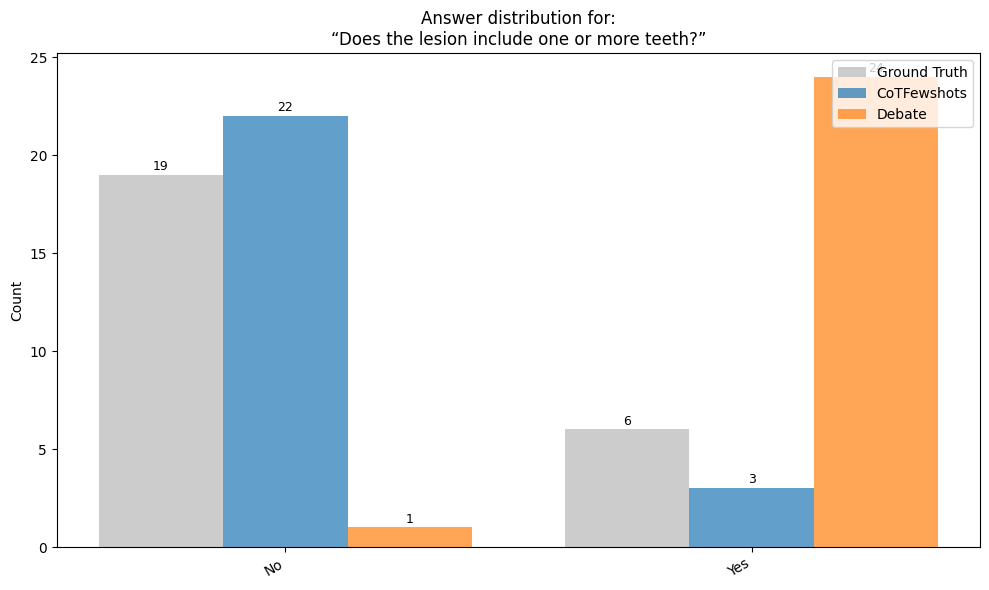

In [9]:
experiment_names = ['CoTFewshots', 'Debate']
doc_anns = util.load_json('evaluation_dataset/doc_anns.json') # List of 25 dicts
path = f"evaluation_results/question_compare/q_{'+'.join(experiment_names)}.png"
visualization.question_lables_distribution('evaluation_dataset/doc_anns.json', experiment_names, 9, path)

# Avg Recall Calculator

In [25]:
exp_name = 'Zeroshot_Claude'
scores = util.load_json(f'evaluation_results/{exp_name}/features_acc.json')
tot = 0
for item in scores.items():
    tot += item[1]
avg = tot / len(scores)
print(avg)

exp_name = 'Zeroshot_Grok'
scores = util.load_json(f'evaluation_results/{exp_name}/features_acc.json')
tot = 0
for item in scores.items():
    tot += item[1]
avg = tot / len(scores)
print(avg)

Loaded content from evaluation_results/Zeroshot_Claude/features_acc.json
0.5282142857142859
Loaded content from evaluation_results/Zeroshot_Grok/features_acc.json
0.5568333333333334
